In [15]:
from impedance import preprocessing
import numpy as np

# Load data from the example EIS data
frequencies, Z = preprocessing.readCSV('./YSZ_Si_T290ohm_C01_3.csv')


#Change the sign of the imaginary part
Z  = Z.real - 1j * Z.imag  # This flips the sign of the imaginary part

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

For this dataset which simply contains impedance data in three columns (frequency, Z_real, Z_imag)

In [51]:
from impedance.models.circuits import CustomCircuit

# https://impedancepy.readthedocs.io/en/latest/circuit-elements.html

circuit = 'R0-p(R1,C1)'
initial_guess = [0.1, 10000, 100000e-12]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

In [52]:
circuit.fit(frequencies, Z)

In [53]:
Z_fit = circuit.predict(frequencies)

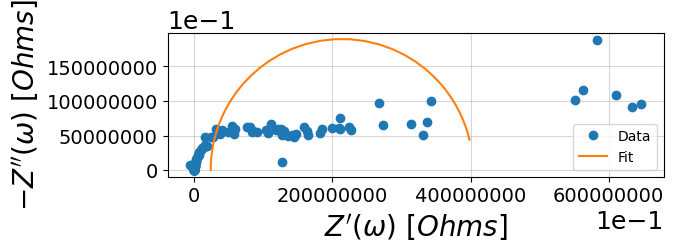

In [54]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()